# Table of Contents
- [Introduction](#introduction)
- [Importing Libraries](#importing-libraries)
- [Data Loading and Cleaning](#data-loading-and-cleaning)
- [Exploratory Data Analysis](#exploratory-data-analysis)
  - [Histograms](#histograms)
  - [Box Plots](#box-plots)
  - [Pair Plot](#pair-plot)
- [Conclusion](#conclusion)

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Importing Libraries
</div>

In [28]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Data Loading
</div>

In [29]:
# Load the dataset
diabetes_data = pd.read_csv('C:/Users/Dell/OneDrive/Documents/python intern/diabetes.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Print the first few rows of the dataset
</div>

In [30]:
print(diabetes_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Print the last few rows of the dataset
</div>

In [31]:
print(diabetes_data.tail())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Statistics
</div>

In [32]:
# Display basic statistics
print(diabetes_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Information 
</div>

In [33]:
# Display information about the dataset
print(diabetes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Empty Cells
</div>

In [34]:
# Check for missing values
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Filling the Empty Cells
</div>

In [35]:
# Replace zero values in specific columns with NaN
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_replace:
    diabetes_data[column] = diabetes_data[column].replace(0, pd.NA)

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Descriptive Statistics After Zero Value Replacement
</div>

In [36]:
# Summary statistics after replacement
print("\nSummary statistics after replacing zero values:")
print(diabetes_data.describe())


Summary statistics after replacing zero values:
       Pregnancies  DiabetesPedigreeFunction         Age     Outcome
count   768.000000                768.000000  768.000000  768.000000
mean      3.845052                  0.471876   33.240885    0.348958
std       3.369578                  0.331329   11.760232    0.476951
min       0.000000                  0.078000   21.000000    0.000000
25%       1.000000                  0.243750   24.000000    0.000000
50%       3.000000                  0.372500   29.000000    0.000000
75%       6.000000                  0.626250   41.000000    1.000000
max      17.000000                  2.420000   81.000000    1.000000


<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Missing Data Summary After Replacement
</div>

In [37]:
# Count the number of NaN values in each column
print("\nCount of NaN values after replacement:")
print(diabetes_data.isnull().sum())


Count of NaN values after replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Fill Missing Values Using Column Medians
</div>

In [38]:
# Perform basic data imputation: fill missing values with the median of the respective columns
diabetes_data.fillna(diabetes_data.median(), inplace=True)

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Check for Missing Values After Data Imputation
</div>

In [39]:
# Verify that there are no missing values left
print("\nCount of NaN values after imputation:")
print(diabetes_data.isnull().sum())


Count of NaN values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Visualizations of Diabetes Dataset
</div>

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Bar Plot
</div>

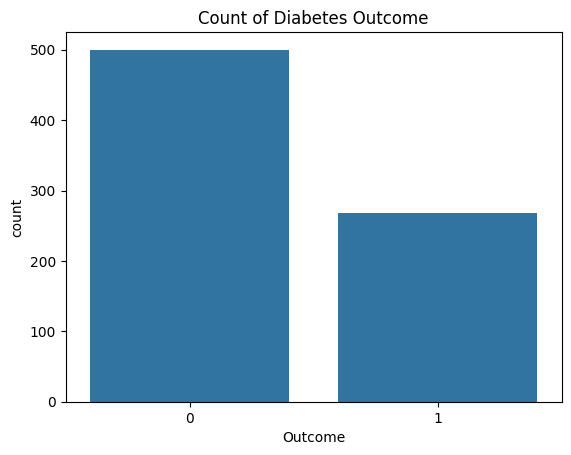

In [40]:
# Generate various visualizations
# Bar plot
sns.countplot(x='Outcome', data=diabetes_data)
plt.title('Count of Diabetes Outcome')
plt.show()

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Scatter Plot
</div>

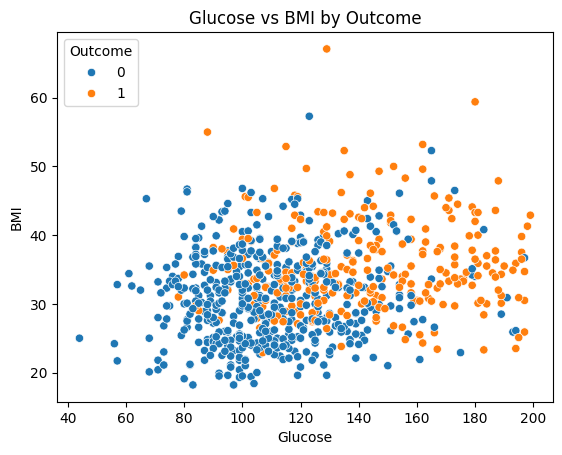

In [41]:
# Scatter plot
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=diabetes_data)
plt.title('Glucose vs BMI by Outcome')
plt.show()

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Correlation Matrix
</div>

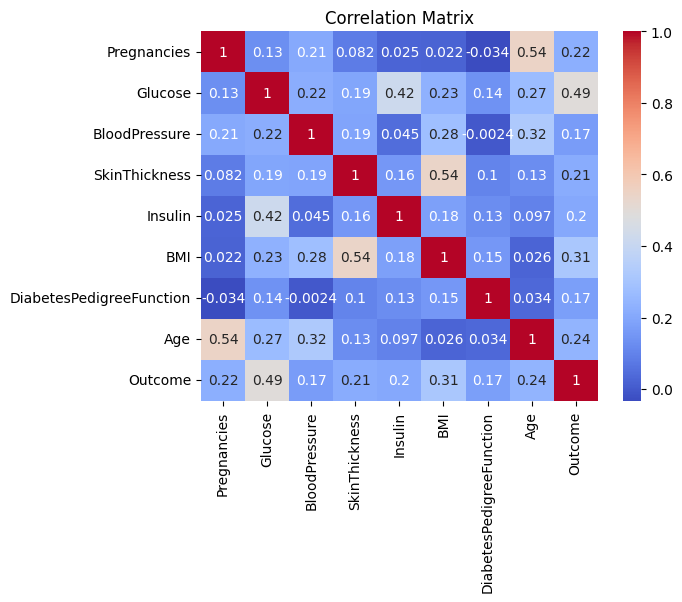

In [42]:
# Correlation matrix
corr_matrix = diabetes_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Feature Scaling
</div>

In [43]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(diabetes_data.drop('Outcome', axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=diabetes_data.columns[:-1])

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Splitting Data
</div>

In [44]:
# Splitting Data
X = scaled_df
y = diabetes_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Training Model
</div>

In [45]:
# Training the Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Model Evaluation
</div>

In [46]:
# Model Evaluation
y_pred_train = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

Training Accuracy: 82.41%


<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Confusion Matrix
</div>

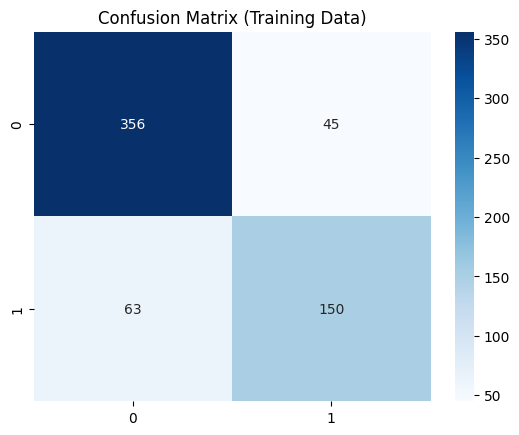

In [47]:
# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Training Data)')
plt.show()

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Classification Report
</div>

In [48]:
# Classification Report
print('Classification Report (Training Data):')
print(classification_report(y_train, y_pred_train))

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       401
           1       0.77      0.70      0.74       213

    accuracy                           0.82       614
   macro avg       0.81      0.80      0.80       614
weighted avg       0.82      0.82      0.82       614



<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Data Testing
</div>

In [49]:
# Data Testing
y_pred_test = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 73.38%


<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Confusion Matrix
</div>

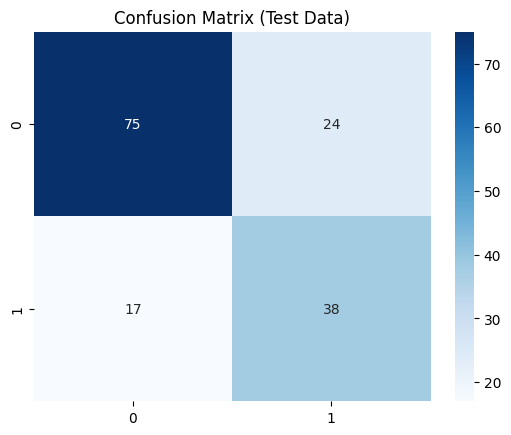

In [50]:
# Confusion Matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Data)')
plt.show()

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Classification Report
</div>

In [51]:
# Classification Report
print('Classification Report (Test Data):')
print(classification_report(y_test, y_pred_test))

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Pie Chart
</div>

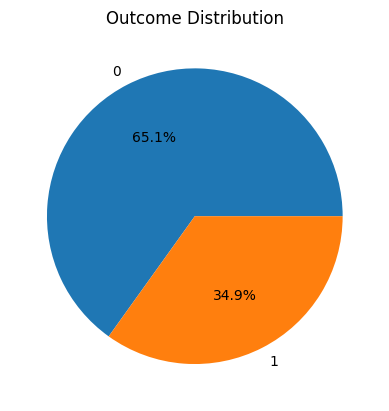

In [16]:
# Pie chart
diabetes_data['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Outcome Distribution')
plt.ylabel('')
plt.show()

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Histograms
</div>

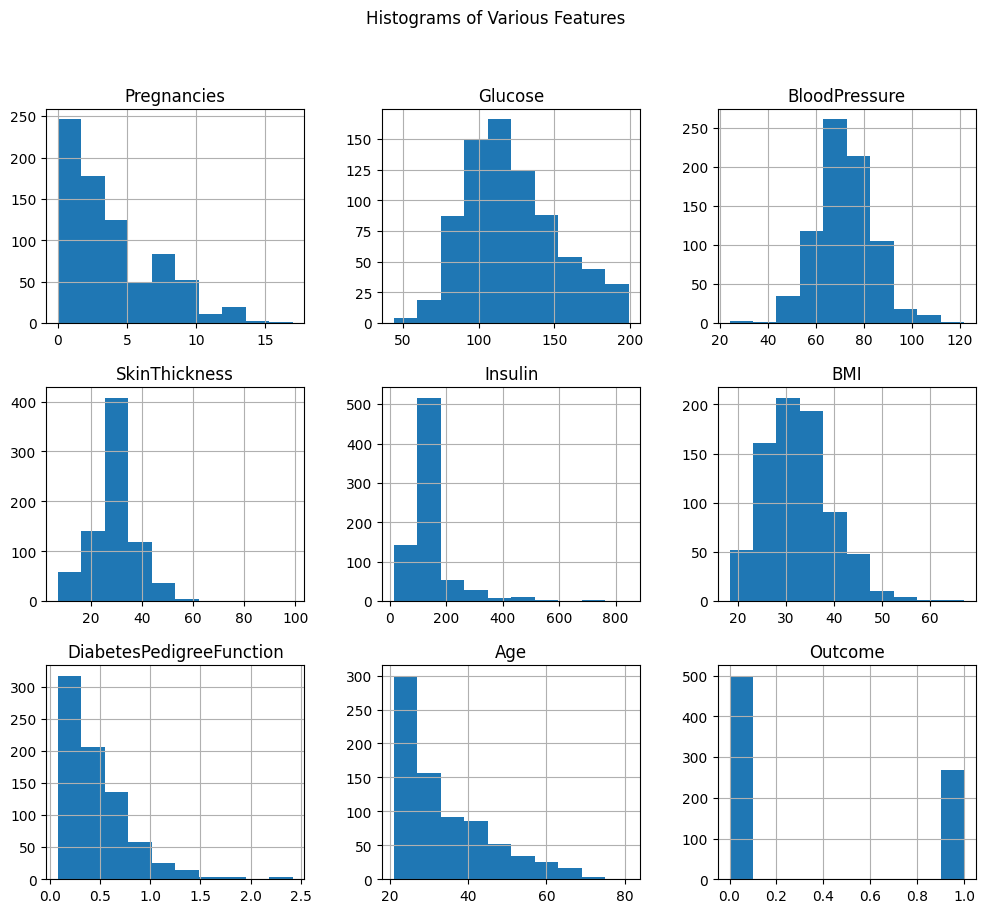

In [17]:
# Histograms for each feature
diabetes_data.hist(figsize=(12, 10))
plt.suptitle('Histograms of Various Features')
plt.show()

<div style="text-align: center; font-family: 'Times New Roman', sans-serif; font-size: 24px; font-weight: bold; text-decoration: underline;">
   Bar Plot for Featuer's
</div>

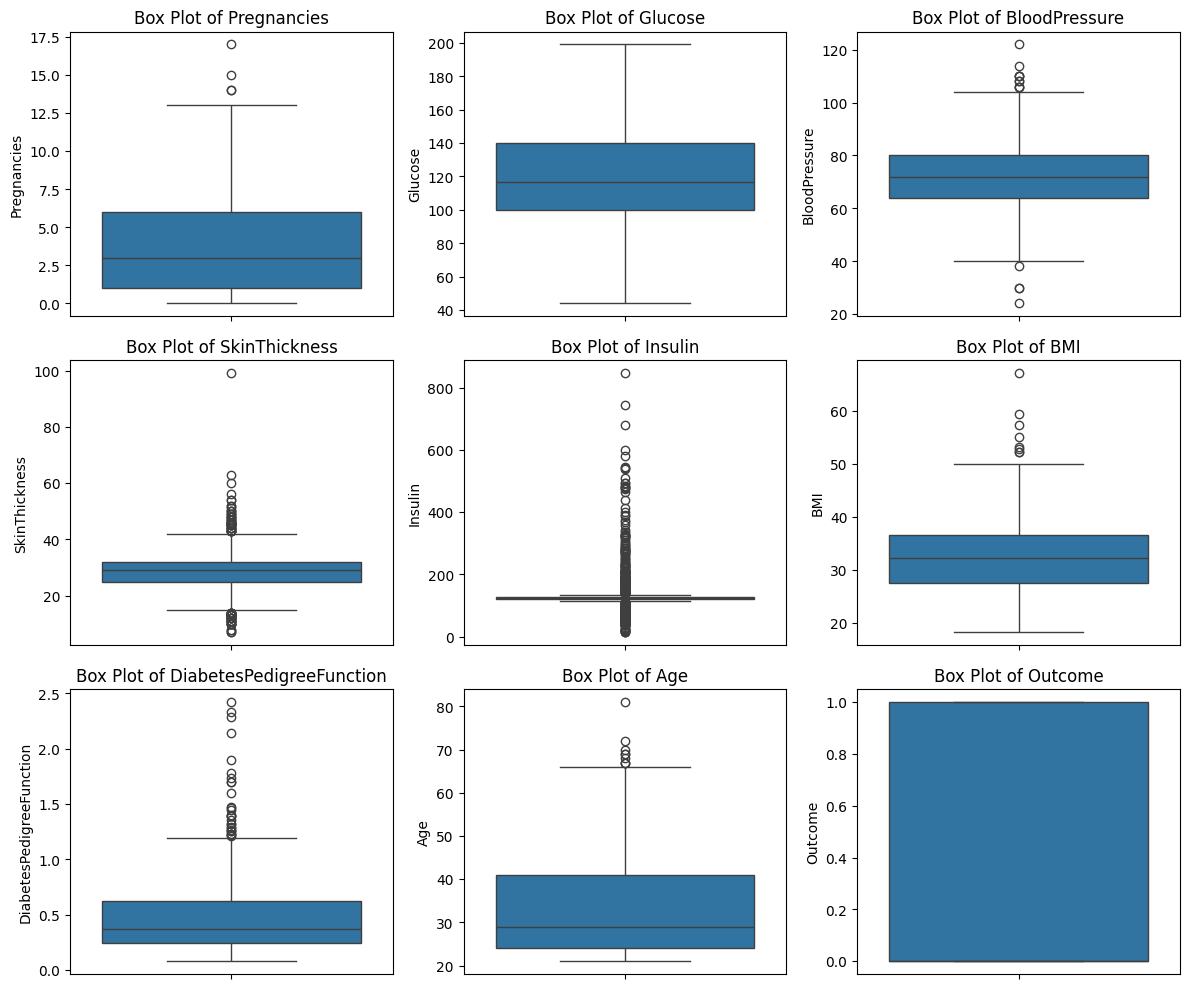

In [18]:
# Box plots for each feature
plt.figure(figsize=(12, 10))
for i, column in enumerate(diabetes_data.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=diabetes_data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()